<a href="https://colab.research.google.com/github/vyomaa/drowsy-driver-detection/blob/main/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir ~/.kaggle

In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download dheerajperumandla/drowsiness-dataset

 98% 158M/161M [00:07<00:00, 19.7MB/s]
100% 161M/161M [00:08<00:00, 21.1MB/s]


In [5]:
!unzip drowsiness-dataset.zip

Archive:  drowsiness-dataset.zip
  inflating: train/Closed/_0.jpg     
  inflating: train/Closed/_1.jpg     
  inflating: train/Closed/_10.jpg    
  inflating: train/Closed/_100.jpg   
  inflating: train/Closed/_101.jpg   
  inflating: train/Closed/_102.jpg   
  inflating: train/Closed/_103.jpg   
  inflating: train/Closed/_104.jpg   
  inflating: train/Closed/_105.jpg   
  inflating: train/Closed/_106.jpg   
  inflating: train/Closed/_107.jpg   
  inflating: train/Closed/_108.jpg   
  inflating: train/Closed/_109.jpg   
  inflating: train/Closed/_11.jpg    
  inflating: train/Closed/_110.jpg   
  inflating: train/Closed/_111.jpg   
  inflating: train/Closed/_112.jpg   
  inflating: train/Closed/_113.jpg   
  inflating: train/Closed/_114.jpg   
  inflating: train/Closed/_115.jpg   
  inflating: train/Closed/_116.jpg   
  inflating: train/Closed/_117.jpg   
  inflating: train/Closed/_118.jpg   
  inflating: train/Closed/_119.jpg   
  inflating: train/Closed/_12.jpg    
  inflating: trai

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
labels = os.listdir("train")
labels

['Closed', 'yawn', 'Open', 'no_yawn']

In [7]:
import cv2
def get_data(dir_path="train/"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 224
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data
data_train = get_data()

0
1


In [8]:
X = []
y = []
for feature, label in data_train:
    X.append(feature)
    y.append(label)

In [9]:
X = np.array(X)
X = X.reshape(-1, 224, 224, 3)

In [10]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [11]:
y = np.array(y)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [13]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(224,224,3))

80134624/80134624 [==============================] - 4s 0us/step


In [14]:
for layer in vgg.layers:
    layer.trainable = False

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 20,049,473
Trainable params: 25,089
Non-trainable params: 20,024,384
_________________________________________________________________


In [17]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.h5",monitor="val_acc",verbose=1,save_best_only=True,
                             save_weights_only=False,save_freq=1)
earlystop = EarlyStopping(monitor="val_acc",patience=5,verbose=1)

In [20]:
history = model.fit(X_train,y_train,batch_size=32,epochs=15,validation_data=(X_test,y_test),
                    verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/15


 1/37 [..............................] - ETA: 14:19 - loss: 2.4502 - accuracy: 0.4375

 2/37 [>.............................] - ETA: 12:32 - loss: 3.1132 - accuracy: 0.4844

 3/37 [=>............................] - ETA: 12:00 - loss: 2.4054 - accuracy: 0.5833

 4/37 [==>...........................] - ETA: 11:42 - loss: 1.8935 - accuracy: 0.6719

 5/37 [===>..........................] - ETA: 11:22 - loss: 1.6966 - accuracy: 0.7063

 6/37 [===>..........................] - ETA: 10:54 - loss: 1.5449 - accuracy: 0.7344

 7/37 [====>.........................] - ETA: 10:35 - loss: 1.3242 - accuracy: 0.7723

 8/37 [=====>........................] - ETA: 10:11 - loss: 1.1588 - accuracy: 0.8008

 9/37 [======>.......................] - ETA: 9:50 - loss: 1.0494 - accuracy: 0.8194 

10/37 [=======>......................] - ETA: 9:31 - loss: 0.9444 - accuracy: 0.8375

11/37 [=======>......................] - ETA: 9:07 - loss: 0.8877 - accuracy: 0.8494

12/37 [========>.....................] - ETA: 8:47 - loss: 0.8283 - accuracy: 0.8594

13/37 [=========>....................] - ETA: 8:27 - loss: 0.7726 - accuracy: 0.8678

14/37 [==========>...................] - ETA: 8:04 - loss: 0.7613 - accuracy: 0.8728

15/37 [===========>..................] - ETA: 7:44 - loss: 0.7105 - accuracy: 0.8813

16/37 [===========>..................] - ETA: 7:22 - loss: 0.6704 - accuracy: 0.8867

17/37 [============>.................] - ETA: 7:01 - loss: 0.6688 - accuracy: 0.8897

18/37 [=============>................] - ETA: 6:40 - loss: 0.6322 - accuracy: 0.8958

19/37 [==============>...............] - ETA: 6:18 - loss: 0.6072 - accuracy: 0.8980

20/37 [===============>..............] - ETA: 5:58 - loss: 0.5773 - accuracy: 0.9031

21/37 [================>.............] - ETA: 5:37 - loss: 0.5498 - accuracy: 0.9077

22/37 [================>.............] - ETA: 5:15 - loss: 0.5411 - accuracy: 0.9105

23/37 [=================>............] - ETA: 4:55 - loss: 0.5391 - accuracy: 0.9130

24/37 [==================>...........] - ETA: 4:37 - loss: 0.5277 - accuracy: 0.9154

25/37 [===================>..........] - ETA: 4:16 - loss: 0.5066 - accuracy: 0.9187

26/37 [====================>.........] - ETA: 3:54 - loss: 0.5180 - accuracy: 0.9183

27/37 [====================>.........] - ETA: 3:33 - loss: 0.4988 - accuracy: 0.9213

28/37 [=====================>........] - ETA: 3:11 - loss: 0.4812 - accuracy: 0.9241

29/37 [======================>.......] - ETA: 2:50 - loss: 0.4646 - accuracy: 0.9267

30/37 [=======================>......] - ETA: 2:29 - loss: 0.4533 - accuracy: 0.9281

31/37 [========================>.....] - ETA: 2:07 - loss: 0.4387 - accuracy: 0.9304

32/37 [========================>.....] - ETA: 1:46 - loss: 0.4588 - accuracy: 0.9316

33/37 [=========================>....] - ETA: 1:25 - loss: 0.4449 - accuracy: 0.9337

34/37 [==========================>...] - ETA: 1:03 - loss: 0.4318 - accuracy: 0.9357

35/37 [===========================>..] - ETA: 42s - loss: 0.4195 - accuracy: 0.9375 

36/37 [============================>.] - ETA: 21s - loss: 0.4079 - accuracy: 0.9392

37/37 [==============================] - ETA: 0s - loss: 0.4047 - accuracy: 0.9397 

37/37 [==============================] - 977s 26s/step - loss: 0.4047 - accuracy: 0.9397 - val_loss: 0.1363 - val_accuracy: 0.9828
Epoch 2/15


 1/37 [..............................] - ETA: 12:09 - loss: 6.6124e-04 - accuracy: 1.0000

 2/37 [>.............................] - ETA: 12:35 - loss: 3.4606e-04 - accuracy: 1.0000

 3/37 [=>............................] - ETA: 12:06 - loss: 2.3071e-04 - accuracy: 1.0000

 4/37 [==>...........................] - ETA: 11:36 - loss: 0.0794 - accuracy: 0.9922    

 5/37 [===>..........................] - ETA: 11:18 - loss: 0.0635 - accuracy: 0.9937

 6/37 [===>..........................] - ETA: 10:51 - loss: 0.0529 - accuracy: 0.9948

 7/37 [====>.........................] - ETA: 10:32 - loss: 0.0455 - accuracy: 0.9955

 8/37 [=====>........................] - ETA: 10:13 - loss: 0.0398 - accuracy: 0.9961

 9/37 [======>.......................] - ETA: 9:49 - loss: 0.0354 - accuracy: 0.9965 

10/37 [=======>......................] - ETA: 9:29 - loss: 0.0319 - accuracy: 0.9969

11/37 [=======>......................] - ETA: 9:09 - loss: 0.0290 - accuracy: 0.9972

12/37 [========>.....................] - ETA: 8:46 - loss: 0.0266 - accuracy: 0.9974

13/37 [=========>....................] - ETA: 8:26 - loss: 0.0803 - accuracy: 0.9952

14/37 [==========>...................] - ETA: 8:04 - loss: 0.0752 - accuracy: 0.9955

15/37 [===========>..................] - ETA: 7:43 - loss: 0.0702 - accuracy: 0.9958

16/37 [===========>..................] - ETA: 7:23 - loss: 0.0763 - accuracy: 0.9941

17/37 [============>.................] - ETA: 7:01 - loss: 0.0720 - accuracy: 0.9945

18/37 [=============>................] - ETA: 6:40 - loss: 0.0711 - accuracy: 0.9931

19/37 [==============>...............] - ETA: 6:19 - loss: 0.0674 - accuracy: 0.9934

20/37 [===============>..............] - ETA: 5:58 - loss: 0.0640 - accuracy: 0.9937

21/37 [================>.............] - ETA: 5:37 - loss: 0.0610 - accuracy: 0.9940

22/37 [================>.............] - ETA: 5:15 - loss: 0.0604 - accuracy: 0.9929

23/37 [=================>............] - ETA: 4:55 - loss: 0.0579 - accuracy: 0.9932

24/37 [==================>...........] - ETA: 4:34 - loss: 0.0554 - accuracy: 0.9935

25/37 [===================>..........] - ETA: 4:12 - loss: 0.0532 - accuracy: 0.9937

26/37 [====================>.........] - ETA: 3:51 - loss: 0.0512 - accuracy: 0.9940

27/37 [====================>.........] - ETA: 3:30 - loss: 0.0493 - accuracy: 0.9942

28/37 [=====================>........] - ETA: 3:09 - loss: 0.0475 - accuracy: 0.9944

29/37 [======================>.......] - ETA: 2:48 - loss: 0.0466 - accuracy: 0.9935

30/37 [=======================>......] - ETA: 2:27 - loss: 0.0458 - accuracy: 0.9937

31/37 [========================>.....] - ETA: 2:06 - loss: 0.0443 - accuracy: 0.9940

32/37 [========================>.....] - ETA: 1:45 - loss: 0.0430 - accuracy: 0.9941

33/37 [=========================>....] - ETA: 1:24 - loss: 0.0417 - accuracy: 0.9943

34/37 [==========================>...] - ETA: 1:02 - loss: 0.0404 - accuracy: 0.9945

35/37 [===========================>..] - ETA: 41s - loss: 0.0393 - accuracy: 0.9946 

36/37 [============================>.] - ETA: 20s - loss: 0.0382 - accuracy: 0.9948

37/37 [==============================] - ETA: 0s - loss: 0.0379 - accuracy: 0.9948 

37/37 [==============================] - 961s 26s/step - loss: 0.0379 - accuracy: 0.9948 - val_loss: 0.0300 - val_accuracy: 0.9931
Epoch 3/15


 1/37 [..............................] - ETA: 12:20 - loss: 1.2198e-05 - accuracy: 1.0000

 2/37 [>.............................] - ETA: 11:57 - loss: 6.0989e-06 - accuracy: 1.0000

 3/37 [=>............................] - ETA: 11:25 - loss: 4.2724e-06 - accuracy: 1.0000

 4/37 [==>...........................] - ETA: 11:09 - loss: 7.5930e-06 - accuracy: 1.0000

 5/37 [===>..........................] - ETA: 10:50 - loss: 6.2352e-06 - accuracy: 1.0000

 6/37 [===>..........................] - ETA: 10:26 - loss: 6.6944e-06 - accuracy: 1.0000

 7/37 [====>.........................] - ETA: 10:08 - loss: 5.9194e-06 - accuracy: 1.0000

 8/37 [=====>........................] - ETA: 9:49 - loss: 5.2317e-06 - accuracy: 1.0000 

 9/37 [======>.......................] - ETA: 9:28 - loss: 6.0045e-06 - accuracy: 1.0000

10/37 [=======>......................] - ETA: 9:07 - loss: 1.4101e-05 - accuracy: 1.0000

11/37 [=======>......................] - ETA: 8:47 - loss: 0.0066 - accuracy: 0.9972    

12/37 [========>.....................] - ETA: 8:27 - loss: 0.0060 - accuracy: 0.9974

13/37 [=========>....................] - ETA: 8:06 - loss: 0.0056 - accuracy: 0.9976

14/37 [==========>...................] - ETA: 7:46 - loss: 0.0052 - accuracy: 0.9978

15/37 [===========>..................] - ETA: 7:26 - loss: 0.0048 - accuracy: 0.9979

16/37 [===========>..................] - ETA: 7:05 - loss: 0.0045 - accuracy: 0.9980

17/37 [============>.................] - ETA: 6:45 - loss: 0.0042 - accuracy: 0.9982

18/37 [=============>................] - ETA: 6:25 - loss: 0.0040 - accuracy: 0.9983

19/37 [==============>...............] - ETA: 6:05 - loss: 0.0038 - accuracy: 0.9984

20/37 [===============>..............] - ETA: 5:44 - loss: 0.0061 - accuracy: 0.9969

21/37 [================>.............] - ETA: 5:24 - loss: 0.0058 - accuracy: 0.9970

22/37 [================>.............] - ETA: 5:04 - loss: 0.0055 - accuracy: 0.9972

23/37 [=================>............] - ETA: 4:43 - loss: 0.0053 - accuracy: 0.9973

24/37 [==================>...........] - ETA: 4:23 - loss: 0.0051 - accuracy: 0.9974

25/37 [===================>..........] - ETA: 4:03 - loss: 0.0049 - accuracy: 0.9975

26/37 [====================>.........] - ETA: 3:43 - loss: 0.0047 - accuracy: 0.9976

27/37 [====================>.........] - ETA: 3:22 - loss: 0.0045 - accuracy: 0.9977

28/37 [=====================>........] - ETA: 3:02 - loss: 0.0044 - accuracy: 0.9978

29/37 [======================>.......] - ETA: 2:42 - loss: 0.0047 - accuracy: 0.9978

30/37 [=======================>......] - ETA: 2:22 - loss: 0.0045 - accuracy: 0.9979

31/37 [========================>.....] - ETA: 2:01 - loss: 0.0044 - accuracy: 0.9980

32/37 [========================>.....] - ETA: 1:41 - loss: 0.0042 - accuracy: 0.9980

33/37 [=========================>....] - ETA: 1:21 - loss: 0.0041 - accuracy: 0.9981

34/37 [==========================>...] - ETA: 1:00 - loss: 0.0040 - accuracy: 0.9982

35/37 [===========================>..] - ETA: 40s - loss: 0.0039 - accuracy: 0.9982 

36/37 [============================>.] - ETA: 20s - loss: 0.0038 - accuracy: 0.9983

37/37 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9983 

37/37 [==============================] - 939s 25s/step - loss: 0.0038 - accuracy: 0.9983 - val_loss: 0.0487 - val_accuracy: 0.9931
Epoch 4/15


 1/37 [..............................] - ETA: 12:23 - loss: 1.3475e-07 - accuracy: 1.0000

 2/37 [>.............................] - ETA: 11:28 - loss: 1.2501e-06 - accuracy: 1.0000

 3/37 [=>............................] - ETA: 11:23 - loss: 5.8986e-05 - accuracy: 1.0000

 4/37 [==>...........................] - ETA: 11:07 - loss: 4.4552e-05 - accuracy: 1.0000

 5/37 [===>..........................] - ETA: 10:46 - loss: 0.0077 - accuracy: 0.9937    

 6/37 [===>..........................] - ETA: 10:25 - loss: 0.0064 - accuracy: 0.9948

 7/37 [====>.........................] - ETA: 10:07 - loss: 0.0055 - accuracy: 0.9955

 8/37 [=====>........................] - ETA: 9:48 - loss: 0.0059 - accuracy: 0.9961 

 9/37 [======>.......................] - ETA: 9:25 - loss: 0.0052 - accuracy: 0.9965

10/37 [=======>......................] - ETA: 9:06 - loss: 0.0047 - accuracy: 0.9969

11/37 [=======>......................] - ETA: 8:46 - loss: 0.0043 - accuracy: 0.9972

12/37 [========>.....................] - ETA: 8:25 - loss: 0.0040 - accuracy: 0.9974

13/37 [=========>....................] - ETA: 8:06 - loss: 0.0037 - accuracy: 0.9976

14/37 [==========>...................] - ETA: 7:46 - loss: 0.0036 - accuracy: 0.9978

15/37 [===========>..................] - ETA: 7:26 - loss: 0.0034 - accuracy: 0.9979

16/37 [===========>..................] - ETA: 7:05 - loss: 0.0032 - accuracy: 0.9980

17/37 [============>.................] - ETA: 6:45 - loss: 0.0036 - accuracy: 0.9982

18/37 [=============>................] - ETA: 6:25 - loss: 0.0034 - accuracy: 0.9983

19/37 [==============>...............] - ETA: 6:04 - loss: 0.0032 - accuracy: 0.9984

20/37 [===============>..............] - ETA: 5:44 - loss: 0.0031 - accuracy: 0.9984

21/37 [================>.............] - ETA: 5:24 - loss: 0.0029 - accuracy: 0.9985

22/37 [================>.............] - ETA: 5:04 - loss: 0.0030 - accuracy: 0.9986

23/37 [=================>............] - ETA: 4:43 - loss: 0.0040 - accuracy: 0.9986

24/37 [==================>...........] - ETA: 4:23 - loss: 0.0048 - accuracy: 0.9974

25/37 [===================>..........] - ETA: 4:03 - loss: 0.0046 - accuracy: 0.9975

26/37 [====================>.........] - ETA: 3:43 - loss: 0.0048 - accuracy: 0.9976

27/37 [====================>.........] - ETA: 3:22 - loss: 0.0046 - accuracy: 0.9977

28/37 [=====================>........] - ETA: 3:02 - loss: 0.0045 - accuracy: 0.9978

29/37 [======================>.......] - ETA: 2:42 - loss: 0.0043 - accuracy: 0.9978

30/37 [=======================>......] - ETA: 2:21 - loss: 0.0042 - accuracy: 0.9979

31/37 [========================>.....] - ETA: 2:01 - loss: 0.0040 - accuracy: 0.9980

32/37 [========================>.....] - ETA: 1:41 - loss: 0.0039 - accuracy: 0.9980

33/37 [=========================>....] - ETA: 1:21 - loss: 0.0038 - accuracy: 0.9981

34/37 [==========================>...] - ETA: 1:00 - loss: 0.0037 - accuracy: 0.9982

35/37 [===========================>..] - ETA: 40s - loss: 0.0036 - accuracy: 0.9982 

36/37 [============================>.] - ETA: 20s - loss: 0.0035 - accuracy: 0.9983

37/37 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9983 

37/37 [==============================] - 938s 25s/step - loss: 0.0035 - accuracy: 0.9983 - val_loss: 0.1012 - val_accuracy: 0.9863
Epoch 5/15


 1/37 [..............................] - ETA: 11:53 - loss: 0.0028 - accuracy: 1.0000

 2/37 [>.............................] - ETA: 11:48 - loss: 0.0014 - accuracy: 1.0000

 3/37 [=>............................] - ETA: 11:33 - loss: 0.0215 - accuracy: 0.9896

 4/37 [==>...........................] - ETA: 11:13 - loss: 0.0162 - accuracy: 0.9922

 5/37 [===>..........................] - ETA: 10:46 - loss: 0.0131 - accuracy: 0.9937

 6/37 [===>..........................] - ETA: 10:28 - loss: 0.0113 - accuracy: 0.9948

 7/37 [====>.........................] - ETA: 10:08 - loss: 0.0097 - accuracy: 0.9955

 8/37 [=====>........................] - ETA: 9:45 - loss: 0.0085 - accuracy: 0.9961 

 9/37 [======>.......................] - ETA: 9:26 - loss: 0.0075 - accuracy: 0.9965

10/37 [=======>......................] - ETA: 9:07 - loss: 0.0068 - accuracy: 0.9969

11/37 [=======>......................] - ETA: 8:45 - loss: 0.0063 - accuracy: 0.9972

12/37 [========>.....................] - ETA: 8:26 - loss: 0.0058 - accuracy: 0.9974

13/37 [=========>....................] - ETA: 8:06 - loss: 0.0053 - accuracy: 0.9976

14/37 [==========>...................] - ETA: 7:46 - loss: 0.0050 - accuracy: 0.9978

15/37 [===========>..................] - ETA: 7:25 - loss: 0.0046 - accuracy: 0.9979

16/37 [===========>..................] - ETA: 7:05 - loss: 0.0068 - accuracy: 0.9961

17/37 [============>.................] - ETA: 6:45 - loss: 0.0064 - accuracy: 0.9963

18/37 [=============>................] - ETA: 6:25 - loss: 0.0060 - accuracy: 0.9965

19/37 [==============>...............] - ETA: 6:04 - loss: 0.0057 - accuracy: 0.9967

20/37 [===============>..............] - ETA: 5:44 - loss: 0.0054 - accuracy: 0.9969

21/37 [================>.............] - ETA: 5:24 - loss: 0.0052 - accuracy: 0.9970

22/37 [================>.............] - ETA: 5:04 - loss: 0.0049 - accuracy: 0.9972

23/37 [=================>............] - ETA: 4:43 - loss: 0.0047 - accuracy: 0.9973

24/37 [==================>...........] - ETA: 4:23 - loss: 0.0045 - accuracy: 0.9974

25/37 [===================>..........] - ETA: 4:03 - loss: 0.0044 - accuracy: 0.9975

26/37 [====================>.........] - ETA: 3:42 - loss: 0.0042 - accuracy: 0.9976

27/37 [====================>.........] - ETA: 3:22 - loss: 0.0041 - accuracy: 0.9977

28/37 [=====================>........] - ETA: 3:02 - loss: 0.0039 - accuracy: 0.9978

29/37 [======================>.......] - ETA: 2:42 - loss: 0.0038 - accuracy: 0.9978

30/37 [=======================>......] - ETA: 2:21 - loss: 0.0037 - accuracy: 0.9979

31/37 [========================>.....] - ETA: 2:01 - loss: 0.0036 - accuracy: 0.9980

32/37 [========================>.....] - ETA: 1:41 - loss: 0.0035 - accuracy: 0.9980

33/37 [=========================>....] - ETA: 1:21 - loss: 0.0034 - accuracy: 0.9981

34/37 [==========================>...] - ETA: 1:00 - loss: 0.0033 - accuracy: 0.9982

35/37 [===========================>..] - ETA: 40s - loss: 0.0032 - accuracy: 0.9982 

36/37 [============================>.] - ETA: 20s - loss: 0.0031 - accuracy: 0.9983

37/37 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.9983 

37/37 [==============================] - 936s 25s/step - loss: 0.0031 - accuracy: 0.9983 - val_loss: 0.0233 - val_accuracy: 0.9897
Epoch 6/15


 1/37 [..............................] - ETA: 12:20 - loss: 3.5478e-10 - accuracy: 1.0000

 2/37 [>.............................] - ETA: 11:59 - loss: 3.6386e-06 - accuracy: 1.0000

 3/37 [=>............................] - ETA: 11:25 - loss: 3.1181e-06 - accuracy: 1.0000

 4/37 [==>...........................] - ETA: 11:08 - loss: 1.0867e-04 - accuracy: 1.0000

 5/37 [===>..........................] - ETA: 10:49 - loss: 9.3033e-05 - accuracy: 1.0000

 6/37 [===>..........................] - ETA: 10:29 - loss: 7.7913e-05 - accuracy: 1.0000

 7/37 [====>.........................] - ETA: 10:06 - loss: 1.5902e-04 - accuracy: 1.0000

 8/37 [=====>........................] - ETA: 9:47 - loss: 1.5065e-04 - accuracy: 1.0000 

 9/37 [======>.......................] - ETA: 9:27 - loss: 1.3398e-04 - accuracy: 1.0000

10/37 [=======>......................] - ETA: 9:05 - loss: 2.2868e-04 - accuracy: 1.0000

11/37 [=======>......................] - ETA: 8:46 - loss: 2.3764e-04 - accuracy: 1.0000

12/37 [========>.....................] - ETA: 8:26 - loss: 0.0011 - accuracy: 1.0000    

13/37 [=========>....................] - ETA: 8:05 - loss: 0.0010 - accuracy: 1.0000

14/37 [==========>...................] - ETA: 7:45 - loss: 9.6394e-04 - accuracy: 1.0000

15/37 [===========>..................] - ETA: 7:25 - loss: 9.0165e-04 - accuracy: 1.0000

16/37 [===========>..................] - ETA: 7:05 - loss: 8.8841e-04 - accuracy: 1.0000

17/37 [============>.................] - ETA: 6:44 - loss: 8.3743e-04 - accuracy: 1.0000

18/37 [=============>................] - ETA: 6:24 - loss: 7.9091e-04 - accuracy: 1.0000

19/37 [==============>...............] - ETA: 6:04 - loss: 7.4929e-04 - accuracy: 1.0000

20/37 [===============>..............] - ETA: 5:43 - loss: 7.1405e-04 - accuracy: 1.0000

21/37 [================>.............] - ETA: 5:23 - loss: 6.8293e-04 - accuracy: 1.0000

22/37 [================>.............] - ETA: 5:03 - loss: 6.5189e-04 - accuracy: 1.0000

23/37 [=================>............] - ETA: 4:43 - loss: 6.2410e-04 - accuracy: 1.0000

24/37 [==================>...........] - ETA: 4:23 - loss: 5.9824e-04 - accuracy: 1.0000

25/37 [===================>..........] - ETA: 4:02 - loss: 5.7431e-04 - accuracy: 1.0000

26/37 [====================>.........] - ETA: 3:42 - loss: 5.5226e-04 - accuracy: 1.0000

27/37 [====================>.........] - ETA: 3:22 - loss: 5.3181e-04 - accuracy: 1.0000

28/37 [=====================>........] - ETA: 3:02 - loss: 5.1282e-04 - accuracy: 1.0000

29/37 [======================>.......] - ETA: 2:41 - loss: 4.9546e-04 - accuracy: 1.0000

30/37 [=======================>......] - ETA: 2:21 - loss: 4.7894e-04 - accuracy: 1.0000

31/37 [========================>.....] - ETA: 2:01 - loss: 4.6681e-04 - accuracy: 1.0000

32/37 [========================>.....] - ETA: 1:41 - loss: 4.5222e-04 - accuracy: 1.0000

33/37 [=========================>....] - ETA: 1:20 - loss: 4.5302e-04 - accuracy: 1.0000

34/37 [==========================>...] - ETA: 1:00 - loss: 4.4416e-04 - accuracy: 1.0000

35/37 [===========================>..] - ETA: 40s - loss: 4.3159e-04 - accuracy: 1.0000 

36/37 [============================>.] - ETA: 20s - loss: 4.2085e-04 - accuracy: 1.0000

37/37 [==============================] - ETA: 0s - loss: 4.1758e-04 - accuracy: 1.0000 

37/37 [==============================] - 937s 25s/step - loss: 4.1758e-04 - accuracy: 1.0000 - val_loss: 0.0252 - val_accuracy: 0.9897
Epoch 7/15


 1/37 [..............................] - ETA: 12:18 - loss: 5.0794e-04 - accuracy: 1.0000

 2/37 [>.............................] - ETA: 11:29 - loss: 2.5492e-04 - accuracy: 1.0000

 3/37 [=>............................] - ETA: 11:23 - loss: 2.2269e-04 - accuracy: 1.0000

 4/37 [==>...........................] - ETA: 11:08 - loss: 1.6801e-04 - accuracy: 1.0000

 5/37 [===>..........................] - ETA: 10:50 - loss: 1.3661e-04 - accuracy: 1.0000

 6/37 [===>..........................] - ETA: 10:26 - loss: 1.2752e-04 - accuracy: 1.0000

 7/37 [====>.........................] - ETA: 10:07 - loss: 1.1205e-04 - accuracy: 1.0000

 8/37 [=====>........................] - ETA: 9:48 - loss: 9.8048e-05 - accuracy: 1.0000 

 9/37 [======>.......................] - ETA: 9:25 - loss: 1.0082e-04 - accuracy: 1.0000

10/37 [=======>......................] - ETA: 9:06 - loss: 9.0736e-05 - accuracy: 1.0000

11/37 [=======>......................] - ETA: 8:46 - loss: 8.2487e-05 - accuracy: 1.0000

12/37 [========>.....................] - ETA: 8:25 - loss: 7.5614e-05 - accuracy: 1.0000

13/37 [=========>....................] - ETA: 8:05 - loss: 7.1187e-05 - accuracy: 1.0000

14/37 [==========>...................] - ETA: 7:45 - loss: 8.0638e-05 - accuracy: 1.0000

15/37 [===========>..................] - ETA: 7:26 - loss: 7.5310e-05 - accuracy: 1.0000

16/37 [===========>..................] - ETA: 7:05 - loss: 7.7892e-05 - accuracy: 1.0000

17/37 [============>.................] - ETA: 6:45 - loss: 7.3730e-05 - accuracy: 1.0000

18/37 [=============>................] - ETA: 6:25 - loss: 6.9640e-05 - accuracy: 1.0000

19/37 [==============>...............] - ETA: 6:04 - loss: 1.0017e-04 - accuracy: 1.0000

20/37 [===============>..............] - ETA: 5:44 - loss: 9.5267e-05 - accuracy: 1.0000

21/37 [================>.............] - ETA: 5:24 - loss: 9.2988e-05 - accuracy: 1.0000

22/37 [================>.............] - ETA: 5:03 - loss: 8.9751e-05 - accuracy: 1.0000

23/37 [=================>............] - ETA: 4:43 - loss: 8.5859e-05 - accuracy: 1.0000

24/37 [==================>...........] - ETA: 4:23 - loss: 8.2531e-05 - accuracy: 1.0000

25/37 [===================>..........] - ETA: 4:03 - loss: 7.9262e-05 - accuracy: 1.0000

26/37 [====================>.........] - ETA: 3:42 - loss: 7.6214e-05 - accuracy: 1.0000

27/37 [====================>.........] - ETA: 3:22 - loss: 7.5640e-05 - accuracy: 1.0000

28/37 [=====================>........] - ETA: 3:02 - loss: 7.2939e-05 - accuracy: 1.0000

29/37 [======================>.......] - ETA: 2:42 - loss: 7.0425e-05 - accuracy: 1.0000

30/37 [=======================>......] - ETA: 2:21 - loss: 6.9016e-05 - accuracy: 1.0000

31/37 [========================>.....] - ETA: 2:01 - loss: 6.6842e-05 - accuracy: 1.0000

32/37 [========================>.....] - ETA: 1:41 - loss: 6.4753e-05 - accuracy: 1.0000

33/37 [=========================>....] - ETA: 1:21 - loss: 6.8605e-05 - accuracy: 1.0000

34/37 [==========================>...] - ETA: 1:00 - loss: 7.4350e-05 - accuracy: 1.0000

35/37 [===========================>..] - ETA: 40s - loss: 7.2226e-05 - accuracy: 1.0000 

36/37 [============================>.] - ETA: 20s - loss: 7.0412e-05 - accuracy: 1.0000

37/37 [==============================] - ETA: 0s - loss: 6.9866e-05 - accuracy: 1.0000 

37/37 [==============================] - 938s 25s/step - loss: 6.9866e-05 - accuracy: 1.0000 - val_loss: 0.0265 - val_accuracy: 0.9931
Epoch 8/15


 1/37 [..............................] - ETA: 11:51 - loss: 2.1538e-06 - accuracy: 1.0000

 2/37 [>.............................] - ETA: 11:58 - loss: 2.9093e-06 - accuracy: 1.0000

 3/37 [=>............................] - ETA: 11:37 - loss: 1.9399e-06 - accuracy: 1.0000

 4/37 [==>...........................] - ETA: 11:16 - loss: 3.2871e-05 - accuracy: 1.0000

 5/37 [===>..........................] - ETA: 10:49 - loss: 2.7244e-05 - accuracy: 1.0000

 6/37 [===>..........................] - ETA: 10:30 - loss: 3.8291e-05 - accuracy: 1.0000

 7/37 [====>.........................] - ETA: 10:11 - loss: 4.5104e-05 - accuracy: 1.0000

 8/37 [=====>........................] - ETA: 9:48 - loss: 4.2598e-05 - accuracy: 1.0000 

 9/37 [======>.......................] - ETA: 9:28 - loss: 8.8835e-05 - accuracy: 1.0000

10/37 [=======>......................] - ETA: 9:09 - loss: 8.0613e-05 - accuracy: 1.0000

11/37 [=======>......................] - ETA: 8:47 - loss: 7.3285e-05 - accuracy: 1.0000

12/37 [========>.....................] - ETA: 8:27 - loss: 8.0502e-05 - accuracy: 1.0000

13/37 [=========>....................] - ETA: 8:07 - loss: 7.4310e-05 - accuracy: 1.0000

14/37 [==========>...................] - ETA: 7:47 - loss: 6.9271e-05 - accuracy: 1.0000

15/37 [===========>..................] - ETA: 7:26 - loss: 6.4654e-05 - accuracy: 1.0000

16/37 [===========>..................] - ETA: 7:06 - loss: 6.0615e-05 - accuracy: 1.0000

17/37 [============>.................] - ETA: 6:46 - loss: 5.7053e-05 - accuracy: 1.0000

18/37 [=============>................] - ETA: 6:25 - loss: 5.4675e-05 - accuracy: 1.0000

19/37 [==============>...............] - ETA: 6:05 - loss: 5.1800e-05 - accuracy: 1.0000

20/37 [===============>..............] - ETA: 5:45 - loss: 4.9377e-05 - accuracy: 1.0000

21/37 [================>.............] - ETA: 5:24 - loss: 4.7048e-05 - accuracy: 1.0000

22/37 [================>.............] - ETA: 5:04 - loss: 4.4910e-05 - accuracy: 1.0000

23/37 [=================>............] - ETA: 4:43 - loss: 4.8422e-05 - accuracy: 1.0000

24/37 [==================>...........] - ETA: 4:23 - loss: 4.6404e-05 - accuracy: 1.0000

25/37 [===================>..........] - ETA: 4:03 - loss: 4.5321e-05 - accuracy: 1.0000

26/37 [====================>.........] - ETA: 3:43 - loss: 4.9298e-05 - accuracy: 1.0000

27/37 [====================>.........] - ETA: 3:22 - loss: 4.7472e-05 - accuracy: 1.0000

28/37 [=====================>........] - ETA: 3:02 - loss: 4.5777e-05 - accuracy: 1.0000

29/37 [======================>.......] - ETA: 2:42 - loss: 4.6074e-05 - accuracy: 1.0000

30/37 [=======================>......] - ETA: 2:21 - loss: 4.4684e-05 - accuracy: 1.0000

31/37 [========================>.....] - ETA: 2:01 - loss: 4.4462e-05 - accuracy: 1.0000

32/37 [========================>.....] - ETA: 1:41 - loss: 4.3980e-05 - accuracy: 1.0000

33/37 [=========================>....] - ETA: 1:21 - loss: 4.2648e-05 - accuracy: 1.0000

34/37 [==========================>...] - ETA: 1:00 - loss: 4.1424e-05 - accuracy: 1.0000

35/37 [===========================>..] - ETA: 40s - loss: 6.1744e-05 - accuracy: 1.0000 

36/37 [============================>.] - ETA: 20s - loss: 6.0032e-05 - accuracy: 1.0000

37/37 [==============================] - ETA: 0s - loss: 5.9670e-05 - accuracy: 1.0000 

37/37 [==============================] - 919s 25s/step - loss: 5.9670e-05 - accuracy: 1.0000 - val_loss: 0.0276 - val_accuracy: 0.9931
Epoch 9/15


 1/37 [..............................] - ETA: 11:49 - loss: 4.3272e-06 - accuracy: 1.0000

 2/37 [>.............................] - ETA: 12:00 - loss: 1.8374e-04 - accuracy: 1.0000

 3/37 [=>............................] - ETA: 11:37 - loss: 1.2270e-04 - accuracy: 1.0000

 4/37 [==>...........................] - ETA: 11:15 - loss: 9.2029e-05 - accuracy: 1.0000

 5/37 [===>..........................] - ETA: 10:50 - loss: 7.3634e-05 - accuracy: 1.0000

 6/37 [===>..........................] - ETA: 10:30 - loss: 7.2200e-05 - accuracy: 1.0000

 7/37 [====>.........................] - ETA: 10:10 - loss: 6.3682e-05 - accuracy: 1.0000

 8/37 [=====>........................] - ETA: 9:47 - loss: 5.5727e-05 - accuracy: 1.0000 

 9/37 [======>.......................] - ETA: 9:28 - loss: 4.9541e-05 - accuracy: 1.0000

10/37 [=======>......................] - ETA: 9:08 - loss: 5.0059e-05 - accuracy: 1.0000

11/37 [=======>......................] - ETA: 8:46 - loss: 4.8079e-05 - accuracy: 1.0000

12/37 [========>.....................] - ETA: 8:27 - loss: 5.3246e-05 - accuracy: 1.0000

13/37 [=========>....................] - ETA: 8:07 - loss: 4.9184e-05 - accuracy: 1.0000

14/37 [==========>...................] - ETA: 7:47 - loss: 4.5767e-05 - accuracy: 1.0000

15/37 [===========>..................] - ETA: 7:26 - loss: 4.2715e-05 - accuracy: 1.0000

16/37 [===========>..................] - ETA: 7:06 - loss: 4.0046e-05 - accuracy: 1.0000

17/37 [============>.................] - ETA: 6:46 - loss: 4.9708e-05 - accuracy: 1.0000

18/37 [=============>................] - ETA: 6:25 - loss: 4.7323e-05 - accuracy: 1.0000

19/37 [==============>...............] - ETA: 6:05 - loss: 4.4851e-05 - accuracy: 1.0000

20/37 [===============>..............] - ETA: 5:45 - loss: 4.2882e-05 - accuracy: 1.0000

21/37 [================>.............] - ETA: 5:24 - loss: 4.3039e-05 - accuracy: 1.0000

22/37 [================>.............] - ETA: 5:04 - loss: 4.2304e-05 - accuracy: 1.0000

23/37 [=================>............] - ETA: 4:44 - loss: 4.0465e-05 - accuracy: 1.0000

24/37 [==================>...........] - ETA: 4:23 - loss: 3.8791e-05 - accuracy: 1.0000

25/37 [===================>..........] - ETA: 4:03 - loss: 3.7671e-05 - accuracy: 1.0000

26/37 [====================>.........] - ETA: 3:43 - loss: 3.6223e-05 - accuracy: 1.0000

27/37 [====================>.........] - ETA: 3:22 - loss: 3.4927e-05 - accuracy: 1.0000

28/37 [=====================>........] - ETA: 3:02 - loss: 3.3753e-05 - accuracy: 1.0000

29/37 [======================>.......] - ETA: 2:42 - loss: 3.2589e-05 - accuracy: 1.0000

30/37 [=======================>......] - ETA: 2:21 - loss: 3.1504e-05 - accuracy: 1.0000

31/37 [========================>.....] - ETA: 2:01 - loss: 3.0501e-05 - accuracy: 1.0000

32/37 [========================>.....] - ETA: 1:41 - loss: 5.0752e-05 - accuracy: 1.0000

33/37 [=========================>....] - ETA: 1:21 - loss: 5.3473e-05 - accuracy: 1.0000

34/37 [==========================>...] - ETA: 1:00 - loss: 5.1900e-05 - accuracy: 1.0000

35/37 [===========================>..] - ETA: 40s - loss: 5.0491e-05 - accuracy: 1.0000 

36/37 [============================>.] - ETA: 20s - loss: 4.9088e-05 - accuracy: 1.0000

37/37 [==============================] - ETA: 0s - loss: 4.8708e-05 - accuracy: 1.0000 

37/37 [==============================] - 936s 25s/step - loss: 4.8708e-05 - accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 0.9931
Epoch 10/15


 1/37 [..............................] - ETA: 12:17 - loss: 6.2705e-05 - accuracy: 1.0000

 2/37 [>.............................] - ETA: 12:01 - loss: 5.5396e-05 - accuracy: 1.0000

 3/37 [=>............................] - ETA: 11:24 - loss: 3.6931e-05 - accuracy: 1.0000

 4/37 [==>...........................] - ETA: 11:08 - loss: 2.7698e-05 - accuracy: 1.0000

 5/37 [===>..........................] - ETA: 10:50 - loss: 2.2159e-05 - accuracy: 1.0000

 6/37 [===>..........................] - ETA: 10:25 - loss: 1.8466e-05 - accuracy: 1.0000

 7/37 [====>.........................] - ETA: 10:07 - loss: 2.9454e-05 - accuracy: 1.0000

 8/37 [=====>........................] - ETA: 9:48 - loss: 2.5924e-05 - accuracy: 1.0000 

 9/37 [======>.......................] - ETA: 9:28 - loss: 2.3049e-05 - accuracy: 1.0000

10/37 [=======>......................] - ETA: 9:06 - loss: 2.1513e-05 - accuracy: 1.0000

11/37 [=======>......................] - ETA: 8:46 - loss: 2.1513e-05 - accuracy: 1.0000

12/37 [========>.....................] - ETA: 8:26 - loss: 1.9721e-05 - accuracy: 1.0000

13/37 [=========>....................] - ETA: 8:05 - loss: 1.8656e-05 - accuracy: 1.0000

14/37 [==========>...................] - ETA: 7:45 - loss: 1.7327e-05 - accuracy: 1.0000

15/37 [===========>..................] - ETA: 7:25 - loss: 1.6332e-05 - accuracy: 1.0000

16/37 [===========>..................] - ETA: 7:04 - loss: 2.8341e-05 - accuracy: 1.0000

17/37 [============>.................] - ETA: 6:44 - loss: 2.6674e-05 - accuracy: 1.0000

18/37 [=============>................] - ETA: 6:24 - loss: 2.5421e-05 - accuracy: 1.0000

19/37 [==============>...............] - ETA: 6:04 - loss: 5.0807e-05 - accuracy: 1.0000

20/37 [===============>..............] - ETA: 5:43 - loss: 4.8285e-05 - accuracy: 1.0000

21/37 [================>.............] - ETA: 5:23 - loss: 4.8770e-05 - accuracy: 1.0000

22/37 [================>.............] - ETA: 5:03 - loss: 4.6553e-05 - accuracy: 1.0000

23/37 [=================>............] - ETA: 4:43 - loss: 4.6997e-05 - accuracy: 1.0000

24/37 [==================>...........] - ETA: 4:22 - loss: 4.5081e-05 - accuracy: 1.0000

25/37 [===================>..........] - ETA: 4:02 - loss: 4.3280e-05 - accuracy: 1.0000

26/37 [====================>.........] - ETA: 3:42 - loss: 4.5653e-05 - accuracy: 1.0000

27/37 [====================>.........] - ETA: 3:22 - loss: 4.3962e-05 - accuracy: 1.0000

28/37 [=====================>........] - ETA: 3:02 - loss: 4.2405e-05 - accuracy: 1.0000

29/37 [======================>.......] - ETA: 2:41 - loss: 4.0943e-05 - accuracy: 1.0000

30/37 [=======================>......] - ETA: 2:21 - loss: 3.9651e-05 - accuracy: 1.0000

31/37 [========================>.....] - ETA: 2:01 - loss: 3.8372e-05 - accuracy: 1.0000

32/37 [========================>.....] - ETA: 1:41 - loss: 3.7334e-05 - accuracy: 1.0000

33/37 [=========================>....] - ETA: 1:20 - loss: 4.6161e-05 - accuracy: 1.0000

34/37 [==========================>...] - ETA: 1:00 - loss: 4.5736e-05 - accuracy: 1.0000

35/37 [===========================>..] - ETA: 40s - loss: 4.4432e-05 - accuracy: 1.0000 

36/37 [============================>.] - ETA: 20s - loss: 4.3199e-05 - accuracy: 1.0000

37/37 [==============================] - ETA: 0s - loss: 4.2864e-05 - accuracy: 1.0000 

37/37 [==============================] - 936s 25s/step - loss: 4.2864e-05 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 0.9931
Epoch 11/15


 1/37 [..............................] - ETA: 12:05 - loss: 1.2854e-09 - accuracy: 1.0000

 2/37 [>.............................] - ETA: 11:38 - loss: 6.4361e-10 - accuracy: 1.0000

 3/37 [=>............................] - ETA: 11:26 - loss: 8.0670e-06 - accuracy: 1.0000

 4/37 [==>...........................] - ETA: 11:08 - loss: 2.7124e-05 - accuracy: 1.0000

 5/37 [===>..........................] - ETA: 10:43 - loss: 2.2360e-05 - accuracy: 1.0000

 6/37 [===>..........................] - ETA: 10:25 - loss: 1.8772e-05 - accuracy: 1.0000

 7/37 [====>.........................] - ETA: 10:06 - loss: 2.2211e-05 - accuracy: 1.0000

 8/37 [=====>........................] - ETA: 9:43 - loss: 1.9435e-05 - accuracy: 1.0000 

 9/37 [======>.......................] - ETA: 9:24 - loss: 2.2979e-05 - accuracy: 1.0000

10/37 [=======>......................] - ETA: 9:05 - loss: 2.1954e-05 - accuracy: 1.0000

11/37 [=======>......................] - ETA: 8:44 - loss: 1.9965e-05 - accuracy: 1.0000

12/37 [========>.....................] - ETA: 8:24 - loss: 1.8306e-05 - accuracy: 1.0000

13/37 [=========>....................] - ETA: 8:04 - loss: 1.6898e-05 - accuracy: 1.0000

14/37 [==========>...................] - ETA: 7:45 - loss: 1.5698e-05 - accuracy: 1.0000

15/37 [===========>..................] - ETA: 7:24 - loss: 4.7579e-05 - accuracy: 1.0000

16/37 [===========>..................] - ETA: 7:04 - loss: 6.6074e-05 - accuracy: 1.0000

17/37 [============>.................] - ETA: 6:44 - loss: 6.2968e-05 - accuracy: 1.0000

18/37 [=============>................] - ETA: 6:23 - loss: 6.8319e-05 - accuracy: 1.0000

19/37 [==============>...............] - ETA: 6:03 - loss: 6.6246e-05 - accuracy: 1.0000

20/37 [===============>..............] - ETA: 5:43 - loss: 6.3220e-05 - accuracy: 1.0000

21/37 [================>.............] - ETA: 5:23 - loss: 6.0210e-05 - accuracy: 1.0000

22/37 [================>.............] - ETA: 5:03 - loss: 5.7483e-05 - accuracy: 1.0000

23/37 [=================>............] - ETA: 4:43 - loss: 5.4984e-05 - accuracy: 1.0000

24/37 [==================>...........] - ETA: 4:23 - loss: 5.2693e-05 - accuracy: 1.0000

25/37 [===================>..........] - ETA: 4:02 - loss: 5.0606e-05 - accuracy: 1.0000

26/37 [====================>.........] - ETA: 3:42 - loss: 5.0672e-05 - accuracy: 1.0000

27/37 [====================>.........] - ETA: 3:22 - loss: 4.8830e-05 - accuracy: 1.0000

28/37 [=====================>........] - ETA: 3:01 - loss: 4.7115e-05 - accuracy: 1.0000

29/37 [======================>.......] - ETA: 2:41 - loss: 4.5502e-05 - accuracy: 1.0000

30/37 [=======================>......] - ETA: 2:21 - loss: 4.3986e-05 - accuracy: 1.0000

31/37 [========================>.....] - ETA: 2:01 - loss: 4.2569e-05 - accuracy: 1.0000

32/37 [========================>.....] - ETA: 1:41 - loss: 4.1547e-05 - accuracy: 1.0000

33/37 [=========================>....] - ETA: 1:20 - loss: 4.1476e-05 - accuracy: 1.0000

34/37 [==========================>...] - ETA: 1:00 - loss: 4.0398e-05 - accuracy: 1.0000

35/37 [===========================>..] - ETA: 40s - loss: 3.9406e-05 - accuracy: 1.0000 

36/37 [============================>.] - ETA: 20s - loss: 3.8311e-05 - accuracy: 1.0000

37/37 [==============================] - ETA: 0s - loss: 3.8019e-05 - accuracy: 1.0000 

37/37 [==============================] - 935s 25s/step - loss: 3.8019e-05 - accuracy: 1.0000 - val_loss: 0.0286 - val_accuracy: 0.9931
Epoch 12/15


 1/37 [..............................] - ETA: 12:19 - loss: 8.2574e-07 - accuracy: 1.0000

 2/37 [>.............................] - ETA: 11:54 - loss: 4.1465e-07 - accuracy: 1.0000

 3/37 [=>............................] - ETA: 11:21 - loss: 2.9053e-07 - accuracy: 1.0000

 4/37 [==>...........................] - ETA: 11:06 - loss: 2.0321e-05 - accuracy: 1.0000

 5/37 [===>..........................] - ETA: 10:48 - loss: 1.6286e-05 - accuracy: 1.0000

 6/37 [===>..........................] - ETA: 10:27 - loss: 1.3624e-05 - accuracy: 1.0000

 7/37 [====>.........................] - ETA: 10:06 - loss: 1.1953e-05 - accuracy: 1.0000

 8/37 [=====>........................] - ETA: 9:47 - loss: 1.1640e-05 - accuracy: 1.0000 

 9/37 [======>.......................] - ETA: 9:27 - loss: 1.0346e-05 - accuracy: 1.0000

10/37 [=======>......................] - ETA: 9:05 - loss: 9.4249e-06 - accuracy: 1.0000

11/37 [=======>......................] - ETA: 8:46 - loss: 8.5681e-06 - accuracy: 1.0000

12/37 [========>.....................] - ETA: 8:26 - loss: 8.8123e-06 - accuracy: 1.0000

13/37 [=========>....................] - ETA: 8:05 - loss: 8.2051e-06 - accuracy: 1.0000

14/37 [==========>...................] - ETA: 7:45 - loss: 7.6230e-06 - accuracy: 1.0000

15/37 [===========>..................] - ETA: 7:25 - loss: 1.0017e-05 - accuracy: 1.0000

16/37 [===========>..................] - ETA: 7:05 - loss: 9.6050e-06 - accuracy: 1.0000

17/37 [============>.................] - ETA: 6:44 - loss: 9.0400e-06 - accuracy: 1.0000

18/37 [=============>................] - ETA: 6:24 - loss: 8.5596e-06 - accuracy: 1.0000

19/37 [==============>...............] - ETA: 6:04 - loss: 1.0037e-05 - accuracy: 1.0000

20/37 [===============>..............] - ETA: 5:43 - loss: 9.5358e-06 - accuracy: 1.0000

21/37 [================>.............] - ETA: 5:23 - loss: 9.1036e-06 - accuracy: 1.0000

22/37 [================>.............] - ETA: 5:03 - loss: 1.4831e-05 - accuracy: 1.0000

23/37 [=================>............] - ETA: 4:43 - loss: 1.8518e-05 - accuracy: 1.0000

24/37 [==================>...........] - ETA: 4:23 - loss: 2.8246e-05 - accuracy: 1.0000

25/37 [===================>..........] - ETA: 4:02 - loss: 2.7187e-05 - accuracy: 1.0000

26/37 [====================>.........] - ETA: 3:42 - loss: 2.7289e-05 - accuracy: 1.0000

27/37 [====================>.........] - ETA: 3:22 - loss: 2.7146e-05 - accuracy: 1.0000

28/37 [=====================>........] - ETA: 3:02 - loss: 2.6353e-05 - accuracy: 1.0000

29/37 [======================>.......] - ETA: 2:41 - loss: 2.5605e-05 - accuracy: 1.0000

30/37 [=======================>......] - ETA: 2:21 - loss: 2.5219e-05 - accuracy: 1.0000

31/37 [========================>.....] - ETA: 2:01 - loss: 2.4408e-05 - accuracy: 1.0000

32/37 [========================>.....] - ETA: 1:41 - loss: 2.3652e-05 - accuracy: 1.0000

33/37 [=========================>....] - ETA: 1:20 - loss: 2.2937e-05 - accuracy: 1.0000

34/37 [==========================>...] - ETA: 1:00 - loss: 2.2262e-05 - accuracy: 1.0000

35/37 [===========================>..] - ETA: 40s - loss: 3.5917e-05 - accuracy: 1.0000 

36/37 [============================>.] - ETA: 20s - loss: 3.5003e-05 - accuracy: 1.0000

37/37 [==============================] - ETA: 0s - loss: 3.4732e-05 - accuracy: 1.0000 

37/37 [==============================] - 936s 25s/step - loss: 3.4732e-05 - accuracy: 1.0000 - val_loss: 0.0294 - val_accuracy: 0.9931
Epoch 13/15


 1/37 [..............................] - ETA: 12:15 - loss: 7.2202e-05 - accuracy: 1.0000

 2/37 [>.............................] - ETA: 11:28 - loss: 3.6101e-05 - accuracy: 1.0000

 3/37 [=>............................] - ETA: 11:21 - loss: 2.5115e-05 - accuracy: 1.0000

 4/37 [==>...........................] - ETA: 11:05 - loss: 1.9000e-05 - accuracy: 1.0000

 5/37 [===>..........................] - ETA: 10:40 - loss: 1.5536e-05 - accuracy: 1.0000

 6/37 [===>..........................] - ETA: 10:23 - loss: 1.2947e-05 - accuracy: 1.0000

 7/37 [====>.........................] - ETA: 10:05 - loss: 1.1097e-05 - accuracy: 1.0000

 8/37 [=====>........................] - ETA: 9:43 - loss: 1.1925e-05 - accuracy: 1.0000 

 9/37 [======>.......................] - ETA: 9:24 - loss: 1.4728e-05 - accuracy: 1.0000

10/37 [=======>......................] - ETA: 9:04 - loss: 1.3255e-05 - accuracy: 1.0000

11/37 [=======>......................] - ETA: 8:45 - loss: 1.2091e-05 - accuracy: 1.0000

12/37 [========>.....................] - ETA: 8:23 - loss: 1.1246e-05 - accuracy: 1.0000

13/37 [=========>....................] - ETA: 8:04 - loss: 1.0439e-05 - accuracy: 1.0000

14/37 [==========>...................] - ETA: 7:44 - loss: 9.6942e-06 - accuracy: 1.0000

15/37 [===========>..................] - ETA: 7:23 - loss: 9.0481e-06 - accuracy: 1.0000

16/37 [===========>..................] - ETA: 7:03 - loss: 8.4833e-06 - accuracy: 1.0000

17/37 [============>.................] - ETA: 6:43 - loss: 1.5641e-05 - accuracy: 1.0000

18/37 [=============>................] - ETA: 6:22 - loss: 1.5039e-05 - accuracy: 1.0000

19/37 [==============>...............] - ETA: 6:02 - loss: 1.4333e-05 - accuracy: 1.0000

20/37 [===============>..............] - ETA: 5:42 - loss: 1.3617e-05 - accuracy: 1.0000

21/37 [================>.............] - ETA: 5:22 - loss: 1.6142e-05 - accuracy: 1.0000

22/37 [================>.............] - ETA: 5:02 - loss: 2.5325e-05 - accuracy: 1.0000

23/37 [=================>............] - ETA: 4:42 - loss: 2.4552e-05 - accuracy: 1.0000

24/37 [==================>...........] - ETA: 4:22 - loss: 2.3751e-05 - accuracy: 1.0000

25/37 [===================>..........] - ETA: 4:01 - loss: 2.3971e-05 - accuracy: 1.0000

26/37 [====================>.........] - ETA: 3:41 - loss: 2.3065e-05 - accuracy: 1.0000

27/37 [====================>.........] - ETA: 3:21 - loss: 2.3412e-05 - accuracy: 1.0000

28/37 [=====================>........] - ETA: 3:01 - loss: 2.2575e-05 - accuracy: 1.0000

29/37 [======================>.......] - ETA: 2:41 - loss: 2.2223e-05 - accuracy: 1.0000

30/37 [=======================>......] - ETA: 2:21 - loss: 2.1748e-05 - accuracy: 1.0000

31/37 [========================>.....] - ETA: 2:00 - loss: 2.1047e-05 - accuracy: 1.0000

32/37 [========================>.....] - ETA: 1:40 - loss: 2.0603e-05 - accuracy: 1.0000

33/37 [=========================>....] - ETA: 1:20 - loss: 2.1182e-05 - accuracy: 1.0000

34/37 [==========================>...] - ETA: 1:00 - loss: 2.1134e-05 - accuracy: 1.0000

35/37 [===========================>..] - ETA: 40s - loss: 3.2186e-05 - accuracy: 1.0000 

36/37 [============================>.] - ETA: 20s - loss: 3.1293e-05 - accuracy: 1.0000

37/37 [==============================] - ETA: 0s - loss: 3.1052e-05 - accuracy: 1.0000 

37/37 [==============================] - 934s 25s/step - loss: 3.1052e-05 - accuracy: 1.0000 - val_loss: 0.0298 - val_accuracy: 0.9931
Epoch 14/15


 1/37 [..............................] - ETA: 12:18 - loss: 4.0072e-06 - accuracy: 1.0000

 2/37 [>.............................] - ETA: 11:53 - loss: 2.1068e-06 - accuracy: 1.0000

 3/37 [=>............................] - ETA: 11:27 - loss: 2.9547e-06 - accuracy: 1.0000

 4/37 [==>...........................] - ETA: 11:04 - loss: 2.2169e-06 - accuracy: 1.0000

 5/37 [===>..........................] - ETA: 10:46 - loss: 1.7736e-06 - accuracy: 1.0000

 6/37 [===>..........................] - ETA: 10:27 - loss: 4.0517e-06 - accuracy: 1.0000

 7/37 [====>.........................] - ETA: 10:04 - loss: 7.8263e-06 - accuracy: 1.0000

 8/37 [=====>........................] - ETA: 9:45 - loss: 2.6835e-05 - accuracy: 1.0000 

 9/37 [======>.......................] - ETA: 9:26 - loss: 2.6250e-05 - accuracy: 1.0000

10/37 [=======>......................] - ETA: 9:04 - loss: 2.3625e-05 - accuracy: 1.0000

11/37 [=======>......................] - ETA: 8:45 - loss: 2.1477e-05 - accuracy: 1.0000

12/37 [========>.....................] - ETA: 8:25 - loss: 2.1031e-05 - accuracy: 1.0000

13/37 [=========>....................] - ETA: 8:04 - loss: 1.9418e-05 - accuracy: 1.0000

14/37 [==========>...................] - ETA: 7:44 - loss: 1.8172e-05 - accuracy: 1.0000

15/37 [===========>..................] - ETA: 7:24 - loss: 1.6969e-05 - accuracy: 1.0000

16/37 [===========>..................] - ETA: 7:04 - loss: 1.5910e-05 - accuracy: 1.0000

17/37 [============>.................] - ETA: 6:43 - loss: 1.5201e-05 - accuracy: 1.0000

18/37 [=============>................] - ETA: 6:23 - loss: 1.4360e-05 - accuracy: 1.0000

19/37 [==============>...............] - ETA: 6:03 - loss: 1.3637e-05 - accuracy: 1.0000

20/37 [===============>..............] - ETA: 5:42 - loss: 1.2965e-05 - accuracy: 1.0000

21/37 [================>.............] - ETA: 5:23 - loss: 1.2708e-05 - accuracy: 1.0000

22/37 [================>.............] - ETA: 5:03 - loss: 1.2159e-05 - accuracy: 1.0000

23/37 [=================>............] - ETA: 4:42 - loss: 1.1834e-05 - accuracy: 1.0000

24/37 [==================>...........] - ETA: 4:22 - loss: 1.1343e-05 - accuracy: 1.0000

25/37 [===================>..........] - ETA: 4:02 - loss: 1.3696e-05 - accuracy: 1.0000

26/37 [====================>.........] - ETA: 3:42 - loss: 1.4599e-05 - accuracy: 1.0000

27/37 [====================>.........] - ETA: 3:21 - loss: 1.4059e-05 - accuracy: 1.0000

28/37 [=====================>........] - ETA: 3:01 - loss: 2.6160e-05 - accuracy: 1.0000

29/37 [======================>.......] - ETA: 2:41 - loss: 2.6959e-05 - accuracy: 1.0000

30/37 [=======================>......] - ETA: 2:21 - loss: 2.8306e-05 - accuracy: 1.0000

31/37 [========================>.....] - ETA: 2:01 - loss: 3.2600e-05 - accuracy: 1.0000

32/37 [========================>.....] - ETA: 1:41 - loss: 3.1588e-05 - accuracy: 1.0000

33/37 [=========================>....] - ETA: 1:20 - loss: 3.0630e-05 - accuracy: 1.0000

34/37 [==========================>...] - ETA: 1:00 - loss: 2.9730e-05 - accuracy: 1.0000

35/37 [===========================>..] - ETA: 40s - loss: 2.8881e-05 - accuracy: 1.0000 

36/37 [============================>.] - ETA: 20s - loss: 2.8078e-05 - accuracy: 1.0000

37/37 [==============================] - ETA: 0s - loss: 2.7861e-05 - accuracy: 1.0000 

37/37 [==============================] - 935s 25s/step - loss: 2.7861e-05 - accuracy: 1.0000 - val_loss: 0.0298 - val_accuracy: 0.9931
Epoch 15/15


 1/37 [..............................] - ETA: 12:13 - loss: 1.9204e-07 - accuracy: 1.0000

 2/37 [>.............................] - ETA: 11:25 - loss: 9.3781e-06 - accuracy: 1.0000

 3/37 [=>............................] - ETA: 11:20 - loss: 1.8237e-05 - accuracy: 1.0000

 4/37 [==>...........................] - ETA: 11:04 - loss: 1.3729e-05 - accuracy: 1.0000

 5/37 [===>..........................] - ETA: 10:39 - loss: 1.1115e-05 - accuracy: 1.0000

 6/37 [===>..........................] - ETA: 10:22 - loss: 9.2649e-06 - accuracy: 1.0000

 7/37 [====>.........................] - ETA: 10:03 - loss: 8.2338e-06 - accuracy: 1.0000

 8/37 [=====>........................] - ETA: 9:43 - loss: 4.5449e-05 - accuracy: 1.0000 

 9/37 [======>.......................] - ETA: 9:22 - loss: 4.1527e-05 - accuracy: 1.0000

10/37 [=======>......................] - ETA: 9:03 - loss: 3.7415e-05 - accuracy: 1.0000

11/37 [=======>......................] - ETA: 8:44 - loss: 3.4015e-05 - accuracy: 1.0000

12/37 [========>.....................] - ETA: 8:22 - loss: 3.1181e-05 - accuracy: 1.0000

13/37 [=========>....................] - ETA: 8:03 - loss: 2.9397e-05 - accuracy: 1.0000

14/37 [==========>...................] - ETA: 7:43 - loss: 2.7297e-05 - accuracy: 1.0000

15/37 [===========>..................] - ETA: 7:23 - loss: 2.5478e-05 - accuracy: 1.0000

16/37 [===========>..................] - ETA: 7:03 - loss: 3.2471e-05 - accuracy: 1.0000

17/37 [============>.................] - ETA: 6:43 - loss: 3.0563e-05 - accuracy: 1.0000

18/37 [=============>................] - ETA: 6:22 - loss: 3.8277e-05 - accuracy: 1.0000

19/37 [==============>...............] - ETA: 6:02 - loss: 3.6265e-05 - accuracy: 1.0000

20/37 [===============>..............] - ETA: 5:42 - loss: 3.4452e-05 - accuracy: 1.0000

21/37 [================>.............] - ETA: 5:22 - loss: 3.2897e-05 - accuracy: 1.0000

22/37 [================>.............] - ETA: 5:02 - loss: 3.3645e-05 - accuracy: 1.0000

23/37 [=================>............] - ETA: 4:42 - loss: 3.2182e-05 - accuracy: 1.0000

24/37 [==================>...........] - ETA: 4:22 - loss: 3.0844e-05 - accuracy: 1.0000

25/37 [===================>..........] - ETA: 4:01 - loss: 2.9610e-05 - accuracy: 1.0000

26/37 [====================>.........] - ETA: 3:41 - loss: 2.8471e-05 - accuracy: 1.0000

27/37 [====================>.........] - ETA: 3:21 - loss: 2.7417e-05 - accuracy: 1.0000

28/37 [=====================>........] - ETA: 3:01 - loss: 2.6438e-05 - accuracy: 1.0000

29/37 [======================>.......] - ETA: 2:41 - loss: 2.5570e-05 - accuracy: 1.0000

30/37 [=======================>......] - ETA: 2:21 - loss: 2.4721e-05 - accuracy: 1.0000

31/37 [========================>.....] - ETA: 2:01 - loss: 2.4901e-05 - accuracy: 1.0000

32/37 [========================>.....] - ETA: 1:40 - loss: 2.4596e-05 - accuracy: 1.0000

33/37 [=========================>....] - ETA: 1:20 - loss: 2.3859e-05 - accuracy: 1.0000

34/37 [==========================>...] - ETA: 1:00 - loss: 2.4084e-05 - accuracy: 1.0000

35/37 [===========================>..] - ETA: 40s - loss: 2.4235e-05 - accuracy: 1.0000 

36/37 [============================>.] - ETA: 20s - loss: 2.4291e-05 - accuracy: 1.0000

37/37 [==============================] - ETA: 0s - loss: 2.5986e-05 - accuracy: 1.0000 

37/37 [==============================] - 934s 25s/step - loss: 2.5986e-05 - accuracy: 1.0000 - val_loss: 0.0301 - val_accuracy: 0.9931


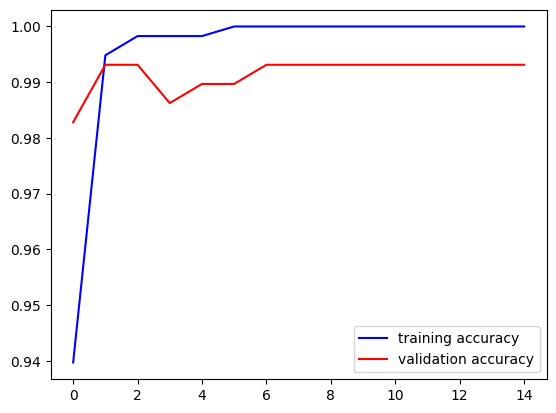

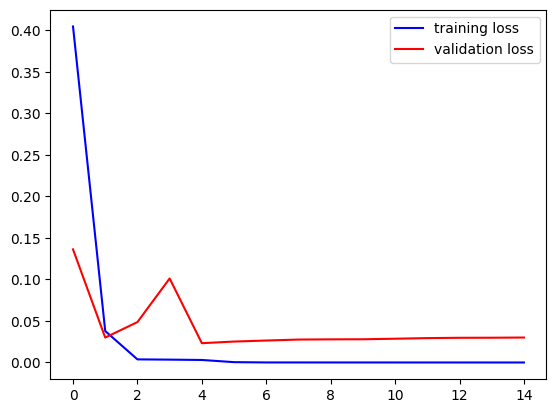

In [21]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="training accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="training loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

As shown, the VGGNet-19 model has given a training accuracy of 100% and a testing or validation accuracy of 99.31%.


These results have been represented in graphical form.


---

Accuracy Comparison of Drowsiness Detection Methods

Authors  | Method | Results
-------------------|------------------|---------------
[1] GWAK ET AL.      | ENSEMBLE MACHINE LEARNING     | 65.2 %
[2] JABBAR ET AL.      | CNN     | 83.33 %
[3] MEHTA ET AL. | EYE ASPECT RATIO AND EYE CLOSURE RATIO | 84 %
[4] KEPESIOVA ET AL. | CONV GRNN, CNN | 84.41 %
[5] DUA ET AL. | ALEXNET, VGG-FACENET, FLOWIMAGENET, RESNET | 85 %
[6] AYTEKIN ET AL. | TRANSFER LEARNING VGG16 | 91 %
METHOD1 | LeNet | 94.46 %
METHOD2 | VGGNet-19 | 99.31% %

References
[1] J. Gwak, A. Hirao, and M. Shino, “An investigation of early detection of driver drowsiness using ensemble machine learning based on hybrid sensing”,  Appl. Sci.,  vol.  10, no. 8,  Apr.  2020, Art no. 2890. https://doi.org/10.3390/app10082890

[2] R. Jabbar, M. Shinoy, M. Kharbeche, K. Al-Khalifa, M. Krichen, and K. Barkaoui, “Driver drowsiness detection model using convolutional neural networks techniques for android application”, in Proceedings of the 2020 IEEE  International  Conference  on  Informatics,  IoT,  and  Enabling Technologies, Doha, Qatar, May 2020, pp. 2–5. https://doi.org/10.1109/ICIoT48696.2020.9089484  

[3] S. Mehta, S. Dadhich, S. Gumber,  and A. J. Bhatt, “Real-time driver drowsiness detection system using eye aspect ratio and eye closure ratio”, in Proceedings of international conference on sustainable computing in science,  technology  and  management  (SUSCOM), Jaipur,  India,  Feb. 2019. https://doi.org/10.2139/ssrn.3356401

[4] Z. Kepesiova, J. Ciganek,  and S. Kozak, “Driver drowsiness detection using convolutional neural networks”, in 2020 Cybernetics & Informatics (K&I),  Velke Karlovice, Czech Republic,  Mar. 2020, pp. 1–6. https://doi.org/10.1109/KI48306.2020.9039851

[5] M. Dua, R. Singla, S. Raj,  and A. Jangra, “Deep CNN models-based ensemble approach to driver drowsiness detection”, Neural Computing and Applications, vol. 33, no. 8, pp. 3155–3168, Jul. 2021.  https://doi.org/10.1007/s00521-020-05209-7

[6] Alper Aytekin, Vasfiye Mençik, "Detection of Driver Dynamics with VGG16 Model", in Applied Computer Systems 27(1):83-88, June 2022. http://dx.doi.org/10.2478/acss-2022-0009





